# Random Dot Product Graphs (RDPG)

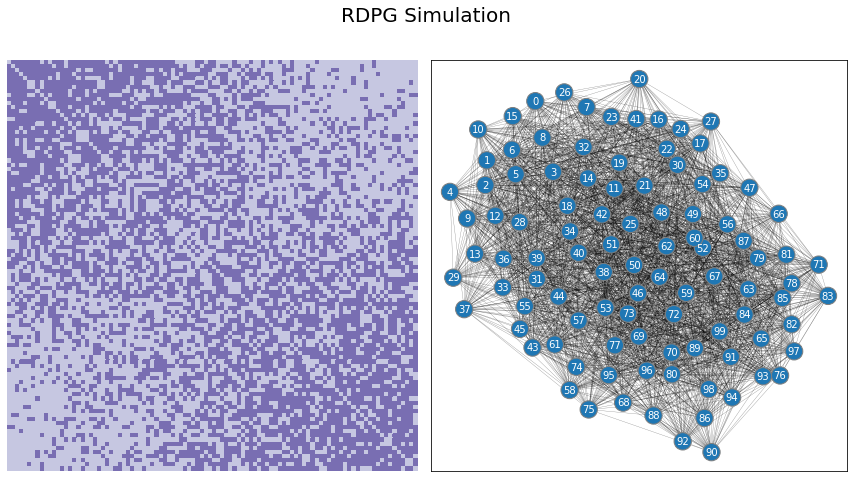

In [1]:
import numpy as np
from graspologic.simulations import rdpg
from graphbook_code import draw_multiplot

n = 100  # the number of nodes in our network

# design the latent position matrix X according to 
# the rules we laid out previously
X = np.zeros((n,2))
for i in range(0, n):
    X[i,:] = [(n - i)/n, i/n]

from graspologic.simulations import rdpg
from graphbook_code import draw_multiplot

A = rdpg(X, directed=False, loops=False)
draw_multiplot(A, title="RDPG Simulation");

## Rethinking the Stocahstic Block Model with a Probability Matrix

Let's imagine that we have a network which follows the Stochastic Block Model. To make this example a little bit more concrete, let's borrow the code example from the [section on Stochastic Block Models](link?). The nodes of our network represent each of the $100$ students in our network. Remember that $\tau$ is the community assignment vector, which indicates which community (one of two schools) each node (student) is in. Here, the first $50$ students attend school $1$, and the second $50$ students attend school $2$:

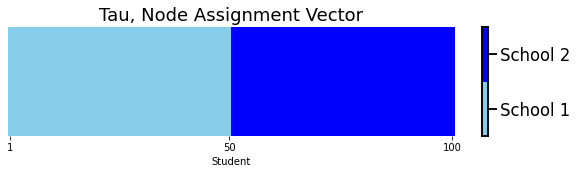

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

def plot_tau(tau, title="", xlab="Node"):
    cmap = matplotlib.colors.ListedColormap(["skyblue", 'blue'])
    fig, ax = plt.subplots(figsize=(10,2))
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap((tau - 1).reshape((1,tau.shape[0])), cmap=cmap,
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        cbar.set_ticks([0.25, .75])
        cbar.set_ticklabels(['School 1', 'School 2'])
        ax.set(xlabel=xlab)
        ax.set_xticks([.5,49.5,99.5])
        ax.set_xticklabels(["1", "50", "100"])
        cbar.ax.set_frame_on(True)
    return

n = 100  # number of students

# tau is a column vector of 150 1s followed by 50 2s
# this vector gives the school each of the 300 students are from
tau = np.vstack((np.ones((int(n/2),1)), np.full((int(n/2),1), 2)))

plot_tau(tau, title="Tau, Node Assignment Vector",
        xlab="Student")

And the block probability matrix $B$ is a $2 \times 2$ matrix, where each entry $b_{kl}$ indicates the probability that a node assigned to community $k$ is connected to a node assigned to community $l$:

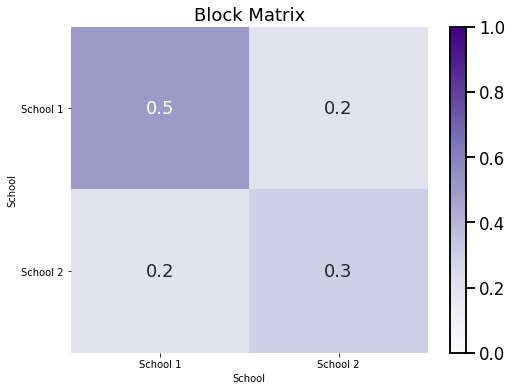

In [4]:
K = 2  # 2 communities in total
# construct the block matrix B as described above
B = [[0.5, 0.2], [0.2, 0.3]]

def plot_block(X, title="", blockname="School", blocktix=[0.5, 1.5],
               blocklabs=["School 1", "School 2"]):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=0, vmax=1, annot=True)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=blockname, xlabel=blockname)
        ax.set_yticks(blocktix)
        ax.set_yticklabels(blocklabs)
        ax.set_xticks(blocktix)
        ax.set_xticklabels(blocklabs)
        cbar.ax.set_frame_on(True)
    return

plot_block(B, title="Block Matrix")
plt.show()

Are there any other ways to describe this scenario, other than using both the community assignment vector $\vec\tau$ and the block matrix $B$?

### Probability Matrices Explicitly State the Probability for each hEdge

Remember, for a given $\vec\tau$ and $B$, that a network which is SBM can be generated using the approach that, given that $\tau_i = \ell$ and $\tau_j = k$, each edge $(i, j)$ comes down to a coin flip, where the edge exists if the coin lands on heads with probability $b_{\tau_i \tau_j}$ or does not exist if the coin lands on tails with probability $1- b_{\tau_i \tau_j}$. However, there's another way we could write down this generative model. Suppose we had a $n \times n$ probability matrix, where for every $j > i$:
\begin{align*}
    p_{ji} = p_{ij}, p_{ij} = \begin{cases}
        b_{11} & \tau_i = 1, \tau_j = 1 \\
        b_{12} & \tau_i = 1, \tau_j = 2 \\
        b_{22} & \tau_i = 2, \tau_j = 2
    \end{cases}
\end{align*}

This matrix $P$ with entries $p_{ij}$ is the probability matrix associated with the SBM. Simply put, this matrix describes the probability $p_{ij}$ of each edge $(i,j)$ between nodes $i$ and $j$ existing. What does $P$ look like?

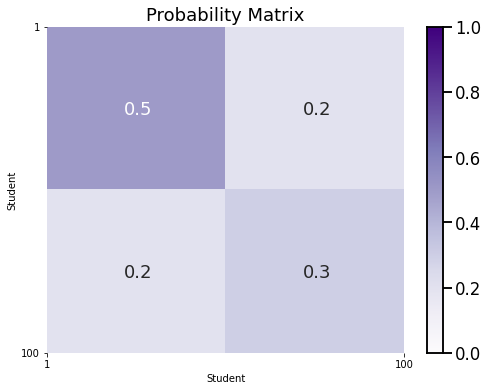

In [38]:
import pandas as pd

def plot_prob(X, title="", nodename="Student", nodetix=None,
             nodelabs=None, ax=None):
    if (ax is None):
        fig, ax = plt.subplots(figsize=(8, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=0, vmax=1, annot=False)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=nodename, xlabel=nodename)
        if (nodetix is not None) and (nodelabs is not None):
            ax.set_yticks(nodetix)
            ax.set_yticklabels(nodelabs)
            ax.set_xticks(nodetix)
            ax.set_xticklabels(nodelabs)
        cbar.ax.set_frame_on(True)
    return

def plot_prob_block_annot(X, title="", nodename="Student", nodetix=None,
             nodelabs=None, ax=None):
    if (ax is None):
        fig, ax = plt.subplots(figsize=(8, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        X_annot = np.empty((100, 100), dtype='U3')
        X_annot[25, 25] = '0.5'
        X_annot[75, 75] = '0.3'
        X_annot[25,75] = '0.2'
        X_annot[75, 25] = '0.2'
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=0, vmax=1, annot=pd.DataFrame(X_annot),
                        fmt='')
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=nodename, xlabel=nodename)
        if (nodetix is not None) and (nodelabs is not None):
            ax.set_yticks(nodetix)
            ax.set_yticklabels(nodelabs)
            ax.set_xticks(nodetix)
            ax.set_xticklabels(nodelabs)
        cbar.ax.set_frame_on(True)
    return

P = np.zeros((n,n))
P[0:50,0:50] = .5
P[50:100, 50:100] = .3
P[0:50,50:100] = .2
P[50:100,0:50] = .2

ax = plot_prob_block_annot(P, title="Probability Matrix", nodetix=[0,100],
              nodelabs=["1", "100"])
plt.show()

As we can see, $P$ captures a similar modular structure to the actual adjacency matrix corresponding to the SBM network. When we say this network is *modular*, we mean that it looks block-y, in that there are clusters of edges sharing a similar probability. Also, $P$ captures the probability of connections between each pair of students. It is the case that $P$ contains the information of both $\vec\tau$ and $B$. This means that we can write down a generative model by specifying *only* $P$, and we no longer need to specify $\vec\tau$ nor $B$ at all.

To represent an $SBM_n(\vec\tau, B)$ random network using $P$ uses a lot more space than using the community assignment vector $\vec\tau$ and the block matrix $B$ alone: $\vec \tau$ has $n$ entries, and $B$ has $K \times K$ entries, where $K$ is typically much smaller than $n$. On the other hand, in this formulation, $P$ has $\binom{n}{2}$ entries, which is much bigger than $n + K \times K$ (since $K$ is usually much smaller than $n$). One thing you might be wondering, however, is can we make things even *more* general by using $P$ instead of $\vec\tau$ and $B$? As we can see in our probability matrix above, there are only $4$ unique entries in total! Can we make $P$ any more general, and still have a statistical model that simplifies the network with fewer than $\binom{n}{2}$ entriess?

### Decomposing the Probability Matrix into Simpler Components

As it turns out, with the probability matrix $P$, for a Stochastic Block Model, $P$ can be decomposed using a matrix $X$, where $P = X X^\top$. We will call a single row of $X$ the vector $\vec x_i$. Remember, using this expression, each entry $p_{ij}$ is the product $\vec x_i^\top \vec x_j$, for all $i, j$. Like $P$, $X$ has $n$ rows, each of which corresponds to a single node in our network. However, the special property of $X$ is that it doesn't *necessarily* have $n$ columns: rather, $X$ often will have many fewer columns than rows. For instance, with $P$ from the example above on Stochastic Block Models, there in fact exists an $X$ with just $2$ columns that can be used to describe $P$. Let's take a look at what $X$ looks like. We won't discuss how to compute this $X$ just yet, but we'll try to build some insight into what's going on here:

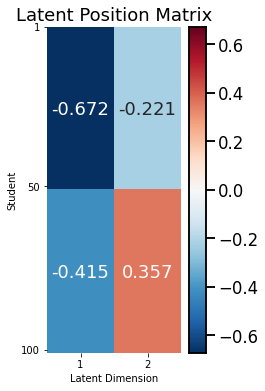

In [45]:
from numpy.linalg import svd
from graphbook_code import cmaps

U, S, V = svd(P)
X = U[:,0:2] @ np.sqrt(np.diag(S[0:2]))

def plot_latent(X, title="", nodename="Student", ylabel="Latent Dimension",
                nodetix=None, nodelabs=None, dimtix=None, dimlabs=None):
    fig, ax = plt.subplots(figsize=(3, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        lim_max = np.max(np.abs(X))
        vmin = -lim_max; vmax = lim_max
        X_annot = np.empty((100, 2), dtype='U6')
        X_annot[25,0] = str("{:.3f}".format(X[25,0]))
        X_annot[75,0] = str("{:.3f}".format(X[75,0]))
        X_annot[25,1] = str("{:.3f}".format(X[25,1]))
        X_annot[75,1] = str("{:.3f}".format(X[75,1]))
        ax = sns.heatmap(X, cmap=cmaps["divergent"],
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=vmin, vmax=vmax,
                        annot=X_annot, fmt='')
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=nodename, xlabel=ylabel)
        if (nodetix is not None) and (nodelabs is not None):
            ax.set_yticks(nodetix)
            ax.set_yticklabels(nodelabs)
        if (dimtix is not None) and (dimlabs is not None):
            ax.set_xticks(dimtix)
            ax.set_xticklabels(dimlabs)
        cbar.ax.set_frame_on(True)
    return


ax = plot_latent(X, title="Latent Position Matrix", nodetix=[0, 49, 99],
              nodelabs=["1", "50", "100"], dimtix=[0.5,1.5], dimlabs=["1", "2"])

plt.show()

One thing we will come back to in a second is the fact that $X$ in this case is relatively simple: there are *only* $4$ unique entries, even though there are $200$ total entries in $X$ (2 columns for each of $100$ students). 

Like we said previously, it turns out that $P$ can be described using *only* this matrix $X$, as $P = XX^\top$! Let's see this in action, by comparing the $P$ we had above to $XX^\top$:

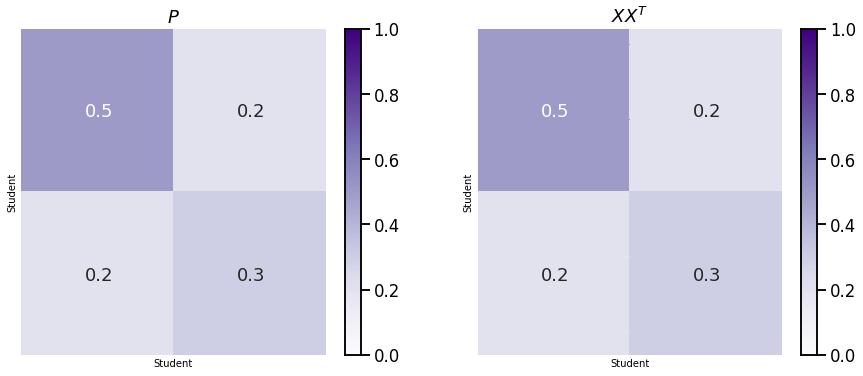

In [46]:
P_XXt = X @ X.T

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

plot_prob_block_annot(P,
        title="$P$",
        ax=axs[0])

plot_prob_block_annot(P_XXt,
        title="$XX^T$",
        ax=axs[1])

As we can see, $P$ and $XX^\top$ are identical! 

This formulation of the SBM lends itself to an even further generalization of our single network models. Like we said a few figures ago, $X$ only has $4$ unique entries, but there is no reason for this restriction really. The matrix $X$ can have *any* number of unique entries, so long as the product of $X$ and its transpose, $XX^\top$, ends up being a probability matrix (every entry is a number between $0$ and $1$).

This matrix $X$ will be called the **latent position matrix**, and each row $\vec x_i$ will be called the **latent position of the node** $i$. In matrix form, $X$ looks like this:

\begin{align*}
 X = \begin{bmatrix}
     \vec x_1 \\
     \vec x_2 \\
     \vdots \\
     \vec x_n
 \end{bmatrix}
\end{align*}

We will call the columns of $X$ the **latent dimensions**, and the total number of columns that $X$ has will be called the **latent dimensionality**. We will often use the letter $d$ to denote the latent dimensionality of the latent position matrix $X$. For this reason, we say that $X$ is an $n$ row (one for each node) and $d$ column (one for each latent dimension) matrix. Therefore, the latent position of the node $i$, $\vec x_i$, is a $d$-dimensional vector. In a few words, the latent dimensionality describes the complexity that the resulting probability matrix $P = XX^\top$ has: if there are more latent dimensions, $P$ can look much more complicated than what we have seen thus far!

## The Random Dot Product Graph (RDPG)

Now that we have some intuition built up, let's circle back to random networks. We will call this particular network model the Random Dot Product Graph (RDPG) model. The way that we can think of the $RDPG$ random network is that the edges depend on a latent position matrix $X$. For each pair of nodes $i$ and $j$, we have a unique coin (we will call this the $(i,j)$ coin) which has a $\vec x_i^\top \vec x_j$ chance of landing on heads, and a $1 - \vec x_i^\top \vec x_j$ chance of landing on tails. If the $(i,j)$ coin lands on heads, the edge between nodes $i$ and $j$ exists, and if the $(i,j)$ coin lands on tails, the edge between nodes $i$ and $j$ does not exist. As before, this coin flip is performed independent of the coin flips for all of the other edges. The notation we use here is just what we are used to in the preceding sections. If $\mathbf A$ is a random network which is $RDPG$ with a latent position matrix $X$, we say that $\mathbf A$ is an $RDPG_n(X)$ random network. 

The procedure below will produce for us a network $A$, which has nodes and edges, where the underlying random network $\mathbf A$ is an $RDPG_n(X)$ random network:

```{admonition} Simulating a realization from an $RDPG_n(X)$ random network
1. Determine a latent position matrix, $X$, whose rows $\vec x_i$ are the latent positions of the nodes in the network.
2. For each pair nodes $i$ and $j$:
    * Obtain a weighted coin $(i,j)$ which has a probability of $\vec x_i^\top \vec x_j$ of landing on heads, and a $1 - \vec x_i^\top \vec x_j$ probability of landing on tails.
    * Flip the $(i,j)$ coin, and if it lands on heads, the corresponding entry $a_{ij}$ in the adjacency matrix is $1$. If the coin lands on tails, the corresponding entry $a_{ij} = 0$.
3. The adjacency matrix we produce, $A$, is a realization of an $RDPG_n(X)$ random network.
```



### Code Examples

We will let $X$ be a little more complex than in our preceding example. Our $X$ will produce a $P$ that still *somewhat* has a modular structure, but not quite as much as before. Let's assume that we have $100$ people who live along a very long road that is $100$ miles long, and each person is $1$ mile apart. The nodes of our network represent the people who live along our assumed street. If two people are closer to one another, it might make sense to think that they have a higher probability of being friends. If two people are neighbors, we think that they will have a very high probability of being friends (almost $1$) and when people are very far apart, we think that they will have a very low probability of being friends (almost $0$). What could we use for $X$?

Remember that the latent positions for each node $i$ are denoted by the vector $\vec x_i$. One possible approach would be to let each $\vec x_i$ be defined as follows:
\begin{align*}
    \vec x_i = \begin{bmatrix}
        \frac{100 - i}{100} \\
        \frac{i}{100}
    \end{bmatrix}
\end{align*}
For instance, $\vec x_1 = \begin{bmatrix}1 \\ 0\end{bmatrix}$, and $\vec x_{100} = \begin{bmatrix} 0 \\ 1\end{bmatrix}$. Note that:
\begin{align*}
p_{1,100} = \vec x_1^\top \vec x_j = 1 \cdot 0 + 0 \cdot 1 = 0
\end{align*}
What happens in between?

Let's consider another person, person $30$. Note that person $30$ lives closer to person $1$ than to person $100$.  Here, $\vec x_{30} = \begin{bmatrix} \frac{7}{10}\\ \frac{3}{10}\end{bmatrix}$. This gives us that:
\begin{align*}
p_{1,30} &= \vec x_1^\top \vec x_{30} = \frac{7}{10}\cdot 1 + 0 \cdot \frac{3}{10} = \frac{7}{10} \\
p_{30, 100} &= \vec x_{30}^\top x_{100} = \frac{7}{10} \cdot 0 + \frac{3}{10} \cdot 1 = \frac{3}{10}
\end{align*}
So this means that person $1$ and person $30$ have a $70\%$ probability of being friends, but person $30$ and $100$ have onl6 a $30\%$ probability of being friends.

Intuitively, it seems like our probability matrix $P$ will capture the intuitive idea we described above. First, we'll take a look at $X$, and then we'll look at $P$:

In [ ]:
n = 100  # the number of nodes in our network

# design the latent position matrix X according to 
# the rules we laid out previously
X = np.zeros((n,2))
for i in range(0, n):
    X[i,:] = [(n - i)/n, i/n]

In [ ]:
def plot_lp(X, title="", ylab="Student"):
    fig, ax = plt.subplots(figsize=(4, 10))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=ylab)
        ax.set_yticks([0, 29, 69, 99])
        ax.set_yticklabels(["1", "30", "70", "100"])
        ax.set_xticks([.5, 1.5])
        ax.set_xticklabels(["Dimension 1", "Dimension 2"])
        cbar.ax.set_frame_on(True)
    return

plot_lp(X, title="Latent Position Matrix, X")

The latent position matrix $X$ that we plotted above is $n \times d$ dimensions. There are a number of approaches, other than looking at a heatmap of $X$, with which we can visualize $X$ to derive insights as to its structure. When $d=2$, another popular visualization is to look at the latent positions, $\vec x_i$, as individual points in $2$-dimensional space. This will give us a scatter plot of $n$ points, each of which has two coordinates. Each point is the latent position for a single node:

In [ ]:
def plot_latents(latent_positions, title=None, labels=None, **kwargs):
    fig, ax = plt.subplots(figsize=(6, 6))
    if ax is None:
        ax = plt.gca()
    ss = 2*np.arange(0, 50)
    plot = sns.scatterplot(x=latent_positions[ss, 0], y=latent_positions[ss, 1], hue=labels, 
                           s=10, ax=ax, palette="Set1", color='k', **kwargs)
    ax.set_title(title)
    ax.set(ylabel="Dimension 1", xlabel="Dimension 2")
    ax.set_title(title)
    return plot

# plot
plot_latents(X, title="Latent Position Matrix, X");

The above scatter plot has been subsampled to show only every $2^{nd}$ latent position, so that the individual $2$-dimensional latent positions are discernable. Due to the way we constructed $X$, the scatter plot would otherwise appear to be a line (due to points overlapping one another). The reason that the points fall along a vertical line when plotted as a vector is due to the method we used to construct entries of $X$, described above. Next, we will look at the probability matrix:

In [ ]:
plot_prob(X.dot(X.transpose()), title="Probability Matrix, P=$XX^T$",
         nodelabs=["1", "30", "70", "100"], nodetix=[0,29,69,99])

Finally, we will sample an RDPG:

In [ ]:
from graspologic.simulations import rdpg
from graphbook_code import draw_multiplot

# sample an RDPG with the latent position matrix
# created above
A = rdpg(X, loops=False, directed=False)

# and plot it
ax = draw_multiplot(A, title="$RDPG_{100}(X)$ Simulation")